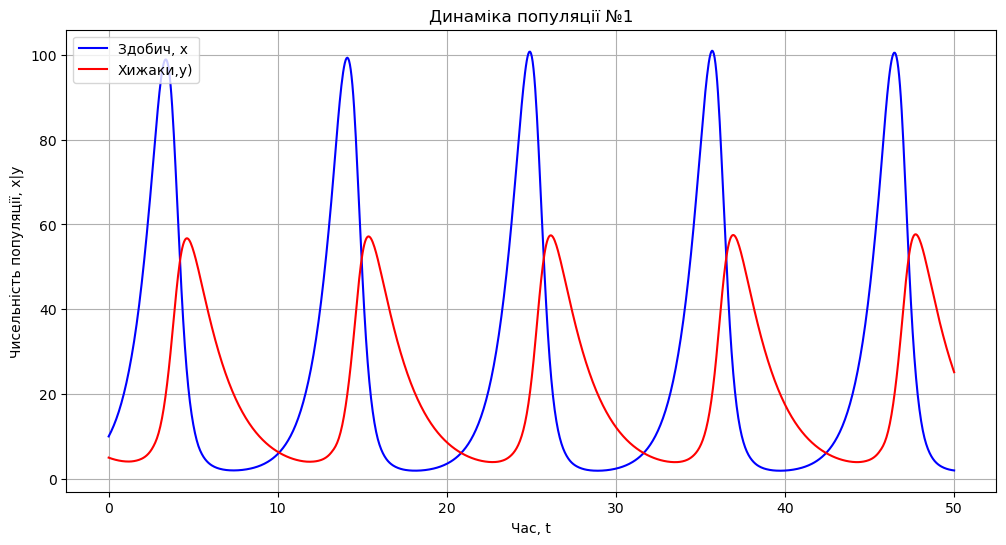

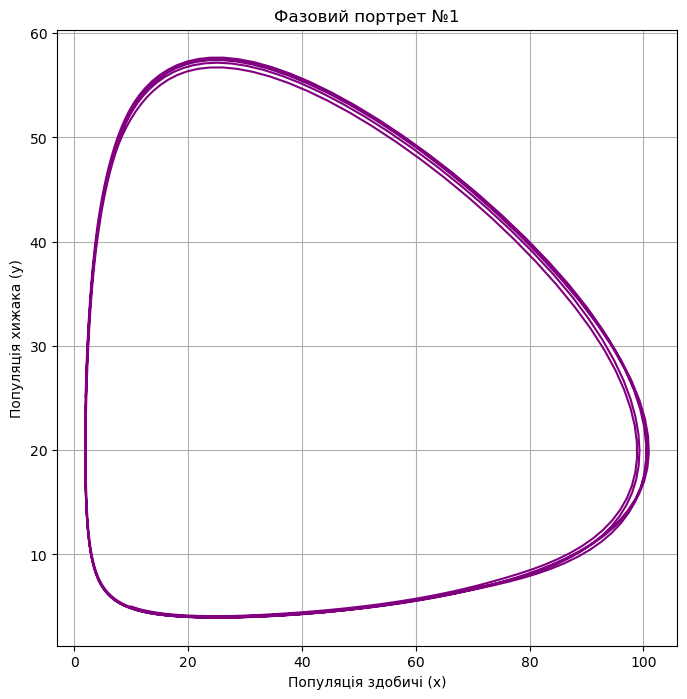

Аналіз №1:
 Prey (x0)  Predator (y0) Tr(J) Sign Det(J) Sign Discriminant Sign Eigenvalues Type     Eigenvalues Sign
        10              5   positive    negative          positive             real [positive, negative]


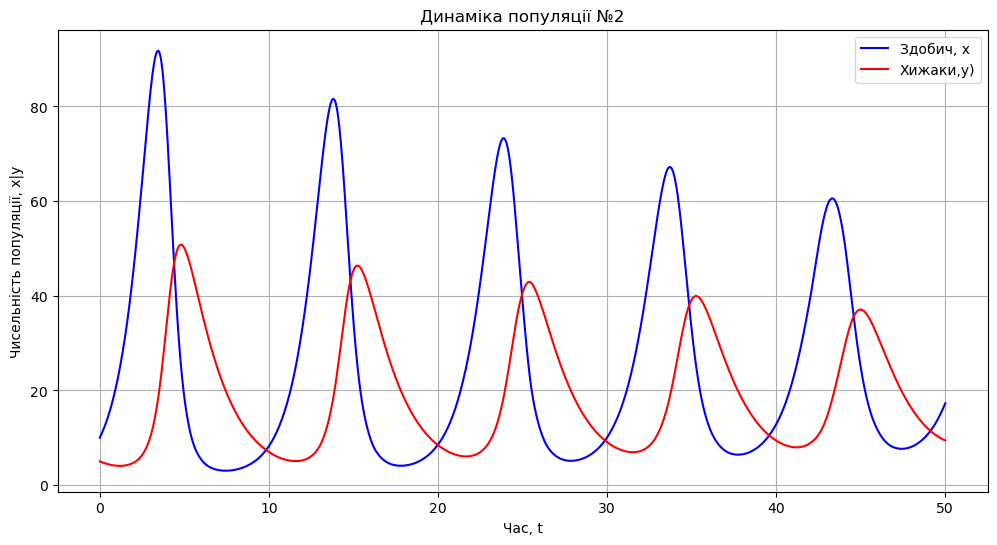

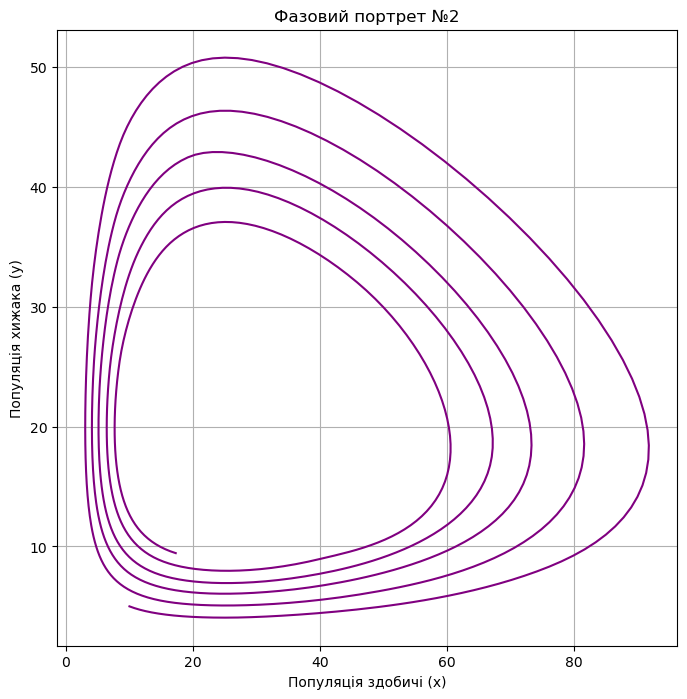

Аналіз №2:
 Prey (x0)  Predator (y0) Tr(J) Sign Det(J) Sign Discriminant Sign Eigenvalues Type     Eigenvalues Sign
        10              5   positive    negative          positive             real [positive, negative]


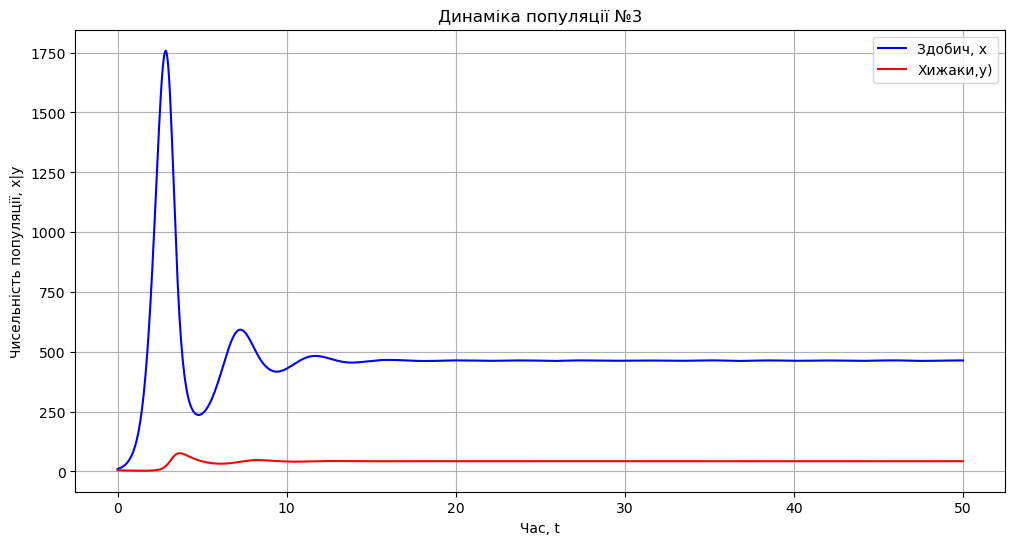

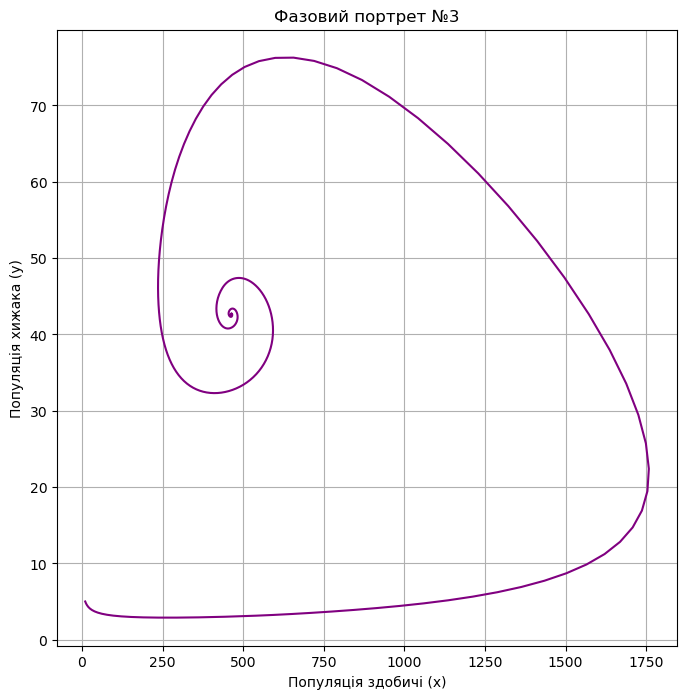

Аналіз №3:
 Prey (x0)  Predator (y0) Tr(J) Sign Det(J) Sign Discriminant Sign Eigenvalues Type     Eigenvalues Sign
        10              5   positive    negative          positive             real [positive, negative]


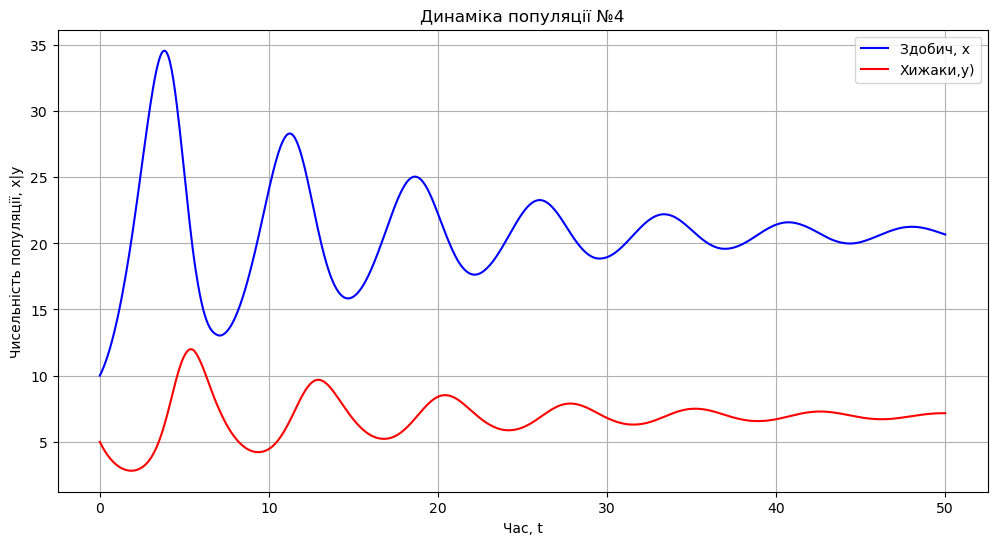

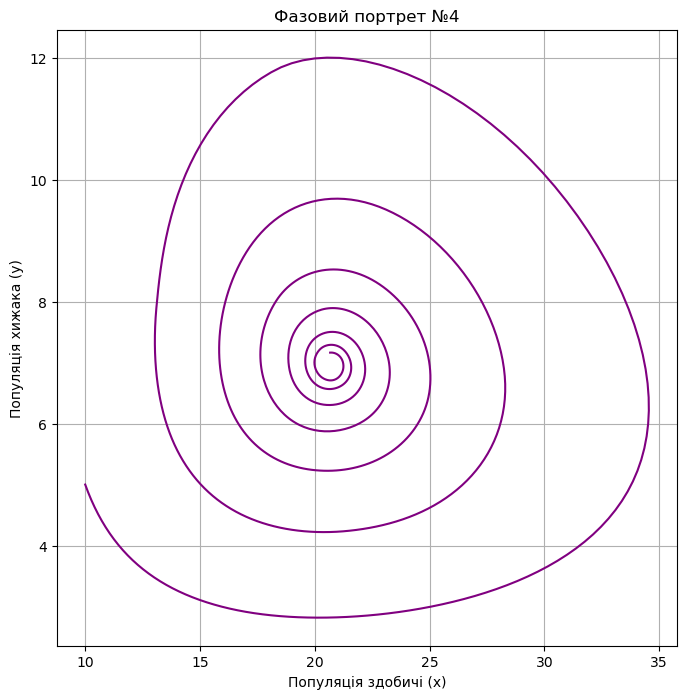

Аналіз №4:
 Prey (x0)  Predator (y0) Tr(J) Sign Det(J) Sign Discriminant Sign Eigenvalues Type     Eigenvalues Sign
        10              5   negative    positive          negative          complex [negative, negative]


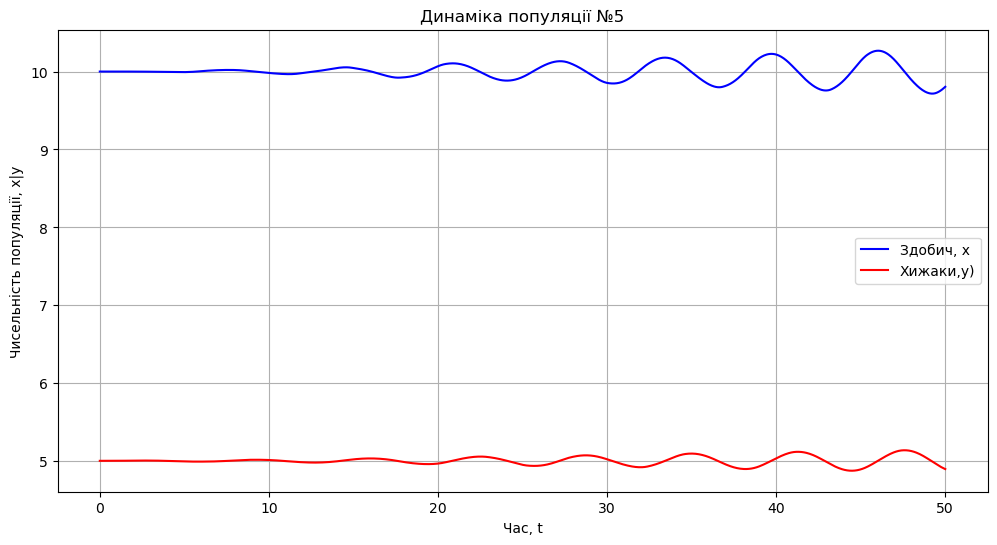

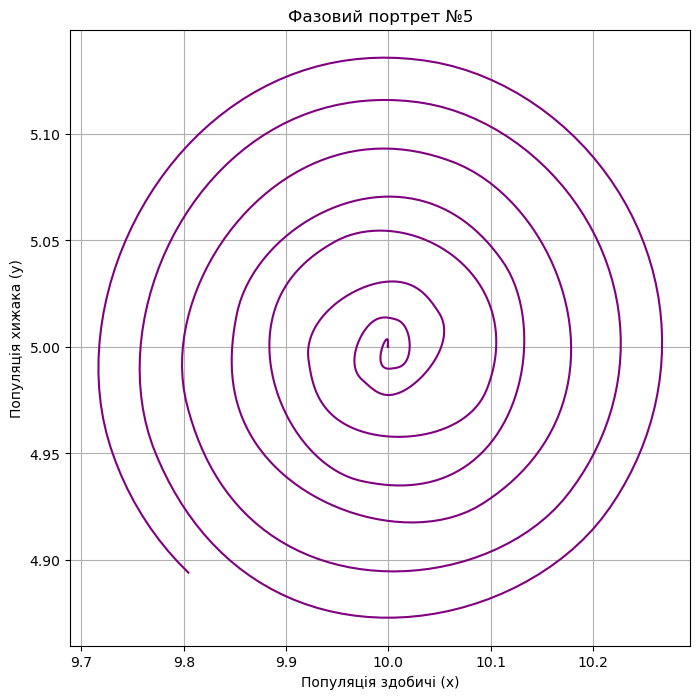

Аналіз №5:
 Prey (x0)  Predator (y0) Tr(J) Sign Det(J) Sign Discriminant Sign Eigenvalues Type     Eigenvalues Sign
        10              5   negative    positive          negative          complex [negative, negative]


In [27]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def lotka_volterra_competition(t, z, epsilon, alpha, delta, beta, gamma_x, gamma_y):
    x, y = z  
    dxdt = epsilon * x - alpha * x * y - gamma_x * x**2 
    dydt = delta * x * y - beta * y - gamma_y * y**2 
    return [dxdt, dydt]

def jacobian_competition(x, y, epsilon, alpha, delta, beta, gamma_x, gamma_y):
    return np.array([
        [epsilon - alpha * y - 2 * gamma_x * x, -alpha * x],
        [delta * y - 2 * gamma_y * y, delta * x - beta]
    ])

def compute_signs_of_jacobian(x, y, epsilon, alpha, delta, beta, gamma_x, gamma_y):
    J = jacobian_competition(x, y, epsilon, alpha, delta, beta, gamma_x, gamma_y)
    
    trace = np.trace(J)
    determinant = np.linalg.det(J)
    
    discriminant = trace**2 - 4 * determinant
    
    eigenvalues = np.linalg.eigvals(J)
    
    trace_sign = 'positive' if trace > 0 else ('negative' if trace < 0 else 'zero')
    determinant_sign = 'positive' if determinant > 0 else ('negative' if determinant < 0 else 'zero')
    discriminant_sign = 'positive' if discriminant > 0 else ('negative' if discriminant < 0 else 'zero')
    
    eigenvalues_signs = ['positive' if l > 0 else ('negative' if l < 0 else 'zero') for l in eigenvalues]
    
    complex_eigenvalues = any(np.iscomplex(l) for l in eigenvalues)
    eigenvalues_type = 'complex' if complex_eigenvalues else 'real'
    
    return trace_sign, determinant_sign, discriminant_sign, eigenvalues_type, eigenvalues_signs


def simulate_and_plot(epsilon, alpha, delta, beta, gamma_x, gamma_y, x0, y0, t_span, title_suffix=""):
    
    z0 = [x0, y0]

    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    solution = solve_ivp(lotka_volterra_competition, t_span, z0, t_eval=t_eval, args=(epsilon, alpha, delta, beta, gamma_x, gamma_y))

    t = solution.t
    x, y = solution.y

    plt.figure(figsize=(12, 6))
    plt.plot(t, x, label="Здобич, x", color="blue")
    plt.plot(t, y, label="Хижаки,y)", color="red")
    plt.xlabel("Час, t")
    plt.ylabel("Чисельність популяції, x|y")
    plt.title(f"Динаміка популяції {title_suffix}")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.plot(x, y, color="purple")
    plt.xlabel("Популяція здобичі (x)")
    plt.ylabel("Популяція хижака (y)")
    plt.title(f"Фазовий портрет {title_suffix}")
    plt.grid()
    plt.show()

    data = [] 
    print(f"Аналіз {title_suffix}:")
    

    trace_sign, determinant_sign, discriminant_sign, eigenvalues_type, eigenvalues_signs = compute_signs_of_jacobian(x0, y0, epsilon, alpha, delta, beta, gamma_x, gamma_y)
    
    data.append([x0, y0, trace_sign, determinant_sign, discriminant_sign, eigenvalues_type, eigenvalues_signs])

    df = pd.DataFrame(data, columns=["Prey (x0)", "Predator (y0)", "Tr(J) Sign", "Det(J) Sign", "Discriminant Sign", "Eigenvalues Type", "Eigenvalues Sign"])
    print(df.to_string(index=False))

params_list = [
    (1.0, 0.05, 0.02, 0.5, 0.0000, 0.0000),  
    (1.0, 0.05, 0.02, 0.5, 0.001, 0.0001),     
    (2.5, 0.05, 0.002, 0.5, 0.0008, 0.01),     
    (0.8, 0.1, 0.05, 1.0, 0.005, 0.005),                    
    (1.0, 0.2, 0.1, 1.0, 0.00001, 0.000003)
]

initial_conditions = [
    (10, 5)  
]

t_span = (0, 50)

for i, params in enumerate(params_list):
    for j, (x0, y0) in enumerate(initial_conditions):
        epsilon, alpha, delta, beta, gamma_x, gamma_y = params
        simulate_and_plot(epsilon, alpha, delta, beta, gamma_x, gamma_y, x0, y0, t_span, title_suffix=f"№{i+1}")

